# **Combinatoire : notions préalables**
### Romain GERARD

Importer les packages.

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sympy import symbols, expand, latex

## Factorielle et coefficient binomial

In [3]:
def facto_rec(x):
    """
    Calcule la factorielle de x de manière récursive.
    """
    if x == 0:
        return 1
    return x * facto_rec(x-1)

def coeff_bino(n, k):
    """
    Calcule le coefficient binomial C(n, k).
    """
    return facto_rec(n) // (facto_rec(k)*facto_rec(n-k))

def coeff_bino_rec(n, k):
    """
    Calcule le coefficient binomial C(n, k) de manière récursive.
    """
    if k > n:
        return 0
    if k == 0 or k == n:
        return 1
    
    return coeff_bino_rec(n-1, k-1) + coeff_bino_rec(n-1, k)

def coeff_bino_dyn(n, k, memo):
    """
    Calcule le coefficient binomial C(n, k) de manière récursive et dynamique.
    """
    if k > n:
        return 0
    if k == 0 or k == n:
        return 1
    
    if (n, k) not in memo:
        memo[(n, k)] = coeff_bino_dyn(n-1, k-1, memo) + coeff_bino_dyn(n-1, k, memo)
    return memo[(n, k)]


# Exemple: 7!
x = 7
display(Math(rf"{x}! = {facto_rec(x)}"))

# Exemple: C(10, 5)
n, k = 10, 2
display(Math(rf"\binom{{{n}}}{{{k}}} = {coeff_bino_rec(n, k)}"))

# Exemple dynamique : C(100, 20)
memo_bino = {}
display(Math(rf"\binom{{{100}}}{{{20}}} = {coeff_bino_dyn(100, 20, memo_bino)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Permutations

In [4]:
def permute_rec(lst):
    """
    Retourne la liste de toutes les permutations de lst, de manière récursive.
    """
    if len(lst) == 0:
        return [[]]

    result = []
    for i in range(len(lst)):
        current = lst[i]
        remaining = lst[:i] + lst[i+1:]
        for e in permute_rec(remaining):
            result.append([current] + e)
    return result


# Exemple
n = 7
A = list(range(1, n+1))
sigma_n = permute_rec(A)

print("A =", A)
print()
print("Ensemble de toutes les n-permutations de A :")
print(sigma_n[0])
print(sigma_n[1])
print(sigma_n[2])
print(sigma_n[3])
print(". . .")
print(sigma_n[-2])
print(sigma_n[-1])

display(Math(rf"|\sigma_n| = {len(sigma_n)}"))
display(Math(rf"|A|! = {facto_rec(len(A))}"))


A = [1, 2, 3, 4, 5, 6, 7]

Ensemble de toutes les n-permutations de A :
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 7, 6]
[1, 2, 3, 4, 6, 5, 7]
[1, 2, 3, 4, 6, 7, 5]
. . .
[7, 6, 5, 4, 3, 1, 2]
[7, 6, 5, 4, 3, 2, 1]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Nombre de Stirling de seconde espèce

In [5]:
def calcule_stirling_rec(n, k):
    """
    Calcule le nombre de Stirling de seconde espèce S(n, k)
    selon une définition récursive.
    
    S(n, k) = S(n-1, k-1) + k * S(n-1, k)
    avec les cas de base :
       - S(0, 0) = 1
       - S(n, 0) = 0 pour n > 0
       - S(0, k) = 0 pour k > 0
    """
    if n == 0 and k == 0:
        return 1
    if (n == 0 and k > 0) or (n > 0 and k == 0):
        return 0

    return calcule_stirling_rec(n-1, k-1) + k*calcule_stirling_rec(n-1, k)

def calcule_stirling_dyn(n, k, memo):
    """
    Calcule le nombre de Stirling de seconde espèce (version dynamique).
    """
    if n == 0 and k == 0:
        return 1
    if (n == 0 and k > 0) or (n > 0 and k == 0):
        return 0

    if (n, k) not in memo:
        memo[(n, k)] = calcule_stirling_dyn(n-1, k-1, memo) + k*calcule_stirling_dyn(n-1, k, memo)
    return memo[(n, k)]

display(Math(r"""
\textbf{Nombres de Stirling de seconde espèce} :
\\
\text{Définition récursive : }
S(n, k) = S(n-1, k-1) + k \, S(n-1, k),
\quad S(0, 0) = 1,
\quad S(x, 0) = S(0, y) = 0 \quad \text{pour tout } x>0, y>0.
"""))

# Exemple
n = 4
for k in range(5):
    display(Math(rf"S({n},{k}) = {calcule_stirling_rec(n,k)}"))

# Exemple dynamique
memo_stir = {}
display(Math(rf"S({10},{5}) = {calcule_stirling_dyn(10, 5, memo_stir)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# Table des nombres de Stirling de seconde espèce (n/k).
L = 10
table_stirling = np.zeros((L, L))
n, k = table_stirling.shape
table_stirling[0, 0] = 1
for i in range(1, n):
    for j in range(1, n):
        table_stirling[i, j] = table_stirling[i-1, j-1] + j*table_stirling[i-1, j]
print("Nombres de Stirling de seconde espèce (n/k):\n", table_stirling, sep="")

Nombres de Stirling de seconde espèce (n/k):
[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    1.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    3.    1.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    7.    6.    1.    0.    0.    0.    0.    0.]
 [   0.    1.   15.   25.   10.    1.    0.    0.    0.    0.]
 [   0.    1.   31.   90.   65.   15.    1.    0.    0.    0.]
 [   0.    1.   63.  301.  350.  140.   21.    1.    0.    0.]
 [   0.    1.  127.  966. 1701. 1050.  266.   28.    1.    0.]
 [   0.    1.  255. 3025. 7770. 6951. 2646.  462.   36.    1.]]


## Nombre de Bell

In [7]:
def calcule_bell_iter(n):
    res = 0
    for k in range(1, n+1):
        res += calcule_stirling_rec(n, k)
    return res

def calcule_bell_rec(n):
    if n == 0:
        return 1
    
    res = 0
    for m in range(n):
        res += coeff_bino(n-1, m) * calcule_bell_rec(m)
    return res

def calcule_bell_dyn(n, memo_bino={}, memo_bell={}):
    # Version dynamique.
    if n == 0:
        return 1
    
    if n in memo_bell:
        return memo_bell[n]
    
    res = 0
    for m in range(n):
        res += coeff_bino_dyn(n-1, m, memo_bino) * calcule_bell_dyn(m, memo_bell)

    memo_bell[n] = res
    return res

display(Math(r"""
\textbf{Nombres de Bell} : B(n) = \sum_{k=1}^{n} S(n,k).
\\
\text{Définition récursive : }
B(n) = \sum_{m=0}^{n-1} \binom{n-1}{m} \, B(m), \quad B(0) = 1.
"""))

# Exemple
for num in range(20, 30):
    display(Math(rf"B({num}) = {calcule_bell_dyn(num)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Partitions

In [8]:
def partitionne_stirling_rec(lst, k):
    """
    Retourne la liste de toutes les partitions de lst en k sous-listes (blocs) en
    s"inspirant de la définition récursive du nombre de Stirling de seconde espèce:
    
                        S(n, k) = S(n-1, k-1) + k * S(n-1, k)
    """
    n = len(lst)

    # -------------
    # Cas de base :
    # -------------

    # Si k = 0 et n = 0, alors on a une seule partition vide.
    if k == 0 and n == 0:
        return [[]]
    
    # Si k = 0 ou n = 0, mais pas les deux en même temps,
    # alors il n"existe aucune partition.
    if (k == 0 or n == 0) and (k != n):
        return []
    
    # Si k = n, chaque élément de lst doit être dans son propre bloc.
    if k == n:
        return [ [[x] for x in lst] ]
    
    # Si k = 1, il n"y a qu"un seul bloc contenant tous les éléments.
    if k == 1:
        return [[lst]]
    
    # Si k > n, il n"existe pas de partition car on ne peut
    # pas répartir n éléments en plus de n blocs non vides.
    if k > n:
        return []
    
    # ----------------------------------------------------
    # Récurrence :
    # 1) On met lst[0] dans son propre bloc, et on partitionne
    #    lst[1:] en (k-1) blocs.
    # 2) On met lst[0] dans chacun des blocs d"une partition de
    #    lst[1:] en k blocs.
    # ----------------------------------------------------

    # Initialiser la liste de toutes les partitions.
    lst_part = []
    
    # 1) Ajouter lst[0] dans un nouveau bloc (S(n-1, k-1))
    for part in partitionne_stirling_rec(lst[1:], k - 1):
        # On ajoute le bloc [lst[0]] devant
        new_part = [[lst[0]]] + part
        lst_part.append(new_part)
    
    # 2) Ajouter lst[0] dans chacun des blocs.
    for part in partitionne_stirling_rec(lst[1:], k):
        # Pour chaque partition obtenue, on crée k nouvelles partitions
        # où lst[0] est inséré dans un seul bloc par partition.
        for i in range(len(part)):
            new_part = []
            for j, bloc in enumerate(part):
                if j == i:
                    # On ajoute lst[0] dans le bloc d"indice i ...
                    new_part.append([lst[0]] + bloc)
                else:
                    # ... sinon on recopie le bloc.
                    new_part.append(bloc[:])
            lst_part.append(new_part)
    
    return lst_part

def partitionne_stirling_dyn(lst, k, memo):
    """
    Version dynamique.
    """
    n = len(lst)

    clef = (tuple(lst), k)
    if clef in memo:
        return memo[clef]

    # -------------
    # Cas de base :
    # -------------
    if k == 0 and n == 0:
        return [[]]
    if (k == 0 or n == 0) and (k != n):
        return []
    if k == n:
        return [ [[x] for x in lst] ]
    if k == 1:
        return [[lst]]
    if k > n:
        return []
    
    # ------------
    # Récurrence :
    # ------------
    lst_part = []
    
    # 1) Ajouter lst[0] dans un nouveau bloc (S(n-1, k-1))
    for part in partitionne_stirling_dyn(lst[1:], k - 1, memo):
        # On ajoute le bloc [lst[0]] devant
        new_part = [[lst[0]]] + part
        lst_part.append(new_part)
    
    # 2) Ajouter lst[0] dans chacun des blocs.
    for part in partitionne_stirling_dyn(lst[1:], k, memo):
        for i in range(len(part)):
            new_part = []
            for j, bloc in enumerate(part):
                if j == i:
                    new_part.append([lst[0]] + bloc)
                else:
                    new_part.append(bloc[:])
            lst_part.append(new_part)

    memo[clef] = lst_part
    return lst_part


# Exemple
A = list(range(1, 11))
k = 5
memo_part = {}
partitions = partitionne_stirling_dyn(A, k, memo_part)
for p in partitions[:4]:
    print(p)
print("...")
for p in partitions[-4:]:
    print(p)

display(Math(rf"S({len(A)},{k}) = {len(partitions)}"))


[[1], [2], [3], [4], [5, 6, 7, 8, 9, 10]]
[[1], [2], [3], [4, 5], [6, 7, 8, 9, 10]]
[[1], [2], [3], [5], [4, 6, 7, 8, 9, 10]]
[[1], [2], [3], [4, 5, 6], [7, 8, 9, 10]]
...
[[6], [1, 7], [8], [9], [2, 3, 4, 5, 10]]
[[6], [7], [1, 8], [9], [2, 3, 4, 5, 10]]
[[6], [7], [8], [1, 9], [2, 3, 4, 5, 10]]
[[6], [7], [8], [9], [1, 2, 3, 4, 5, 10]]


<IPython.core.display.Math object>

In [9]:
def partitionne_bell(lst):
    """
    Retourne la liste de toutes les partitions des éléments de lst en s"inspirant
    de la définition du nombre de Bell comme une somme de nombres de Stirling de
    seconde espèce.
    """
    n = len(lst)
    all_part = []
    memo_part = {}
    for k in range(n+1):
        all_part = all_part + partitionne_stirling_dyn(lst, k, memo_part)
    return all_part


# Exemple
A = list(range(1, 5))
all_partitions = partitionne_bell(A)
for part in all_partitions:
    print(part) 

display(Math(rf"B({len(A)}) = {len(all_partitions)}"))
        

[[1, 2, 3, 4]]
[[1], [2, 3, 4]]
[[1, 2], [3, 4]]
[[2], [1, 3, 4]]
[[1, 2, 3], [4]]
[[2, 3], [1, 4]]
[[1, 3], [2, 4]]
[[3], [1, 2, 4]]
[[1], [2], [3, 4]]
[[1], [2, 3], [4]]
[[1], [3], [2, 4]]
[[1, 2], [3], [4]]
[[2], [1, 3], [4]]
[[2], [3], [1, 4]]
[[1], [2], [3], [4]]


<IPython.core.display.Math object>

## Statistiques sur les permutations

Descente, ascension, excédence et inversion.

In [10]:
def liste_desc(perm):
    """
    Retourne les indices i tels que σ(i) > σ(i+1).
    """
    n = len(perm)
    lst = [i for i in range(n-1) if perm[i] > perm[i+1]]
    return lst


def liste_asc(perm):
    """
    Retourne les indices i tels que σ(i) < σ(i+1).
    """
    n = len(perm)
    lst = [i for i in range(n-1) if perm[i] < perm[i+1]]
    return lst


def liste_exce(perm):
    """
    Retourne les indices i tels que σ(i) > i.
    """
    n = len(perm)
    lst = [i for i in range(n-1) if perm[i] > i]
    return lst


def liste_inv(perm):
    """
    Retourne les paires (i, j) avec i < j et σ(i) > σ(j).
    """
    n = len(perm)
    lst = [(i, j) for i in range(n) for j in range(i+1, n) if perm[i] > perm[j]]
    return lst


# Exemple
n = 10
n_perm = [0, 1, 2, 3, 4, 5, 8, 7, 9, 6]

print(f"Permutation:\n{n_perm}")
print(f"Descentes :\n{liste_desc(n_perm)}")
print(f"Ascensions :\n{liste_asc(n_perm)}")
print(f"Excédence :\n{liste_exce(n_perm)}")
print(f"Inversions :\n{liste_inv(n_perm)}")


Permutation:
[0, 1, 2, 3, 4, 5, 8, 7, 9, 6]
Descentes :
[6, 8]
Ascensions :
[0, 1, 2, 3, 4, 5, 7]
Excédence :
[6, 8]
Inversions :
[(6, 7), (6, 9), (7, 9), (8, 9)]


Visualisation des distributions des statistiques.

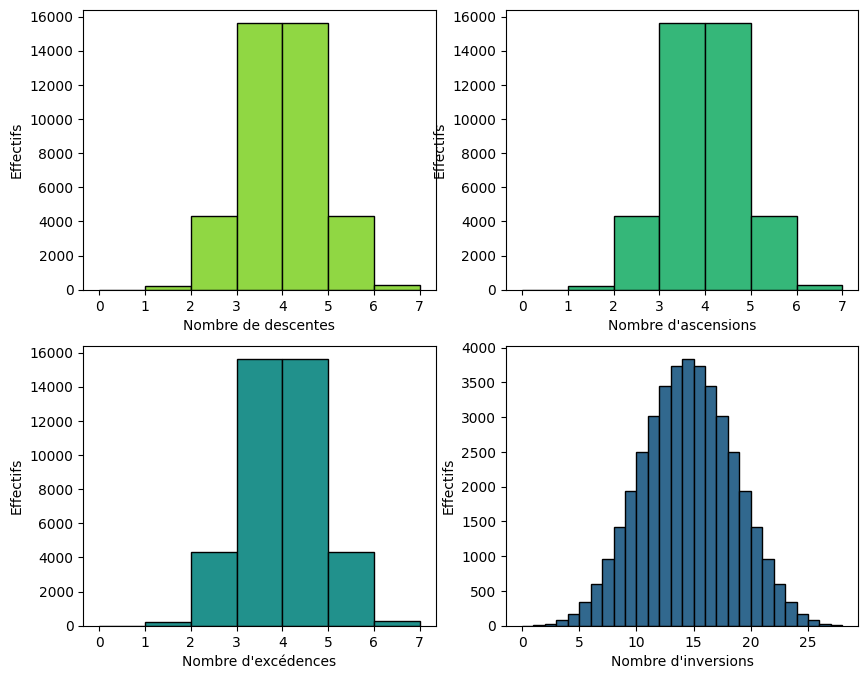

Analyse sur 40320 permutations de taille 8.


In [11]:
# Paramètres
n = 8
A = list(range(n))

# Générer les permutations
permutations = permute_rec(A)

# Calculer les statistiques
desc_counts = []
asc_counts  = []
exce_counts = []
inv_counts  = []

for perm in permutations:
    desc_counts.append(len(liste_desc(perm)))
    asc_counts.append(len(liste_asc(perm)))
    exce_counts.append(len(liste_exce(perm)))
    inv_counts.append(len(liste_inv(perm)))

# ------------
# Visualiser
# ------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Nombre de descentes
axes[0,0].hist(desc_counts, bins="auto", color="#90d743", edgecolor="black")
axes[0,0].set_xlabel("Nombre de descentes")
axes[0,0].set_ylabel("Effectifs")

# Nombre d"ascensions
axes[0,1].hist(asc_counts, bins="auto", color="#35b779", edgecolor="black")
axes[0,1].set_xlabel("Nombre d'ascensions")
axes[0,1].set_ylabel("Effectifs")

# Nombre d"excédences
axes[1,0].hist(exce_counts, bins="auto", color="#21918c", edgecolor="black")
axes[1,0].set_xlabel("Nombre d'excédences")
axes[1,0].set_ylabel("Effectifs")

# Nombre d"inversions
axes[1,1].hist(inv_counts, bins="auto", color="#31688e", edgecolor="black")
axes[1,1].set_xlabel("Nombre d'inversions")
axes[1,1].set_ylabel("Effectifs")

plt.show()

print(f"Analyse sur {len(permutations)} permutations de taille {n}.")

## Nombres Euclidiens